In [1]:
import numpy as np

In [1]:
import pandas as pd
import nltk
import seaborn as sns

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.head()

Id   ProductId          UserId                      ProfileName   
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian  \
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time   
0                     1                       1      5  1303862400  \
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [4]:
df.shape

(568454, 10)

In [5]:
df = df[:500]

In [6]:
df.head()

Id   ProductId          UserId                      ProfileName   
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian  \
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time   
0                     1                       1      5  1303862400  \
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.style.use("ggplot")

In [9]:
%%markdown 
## EDA

## EDA


In [10]:
df["Score"].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores("I am excited and horny")

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}

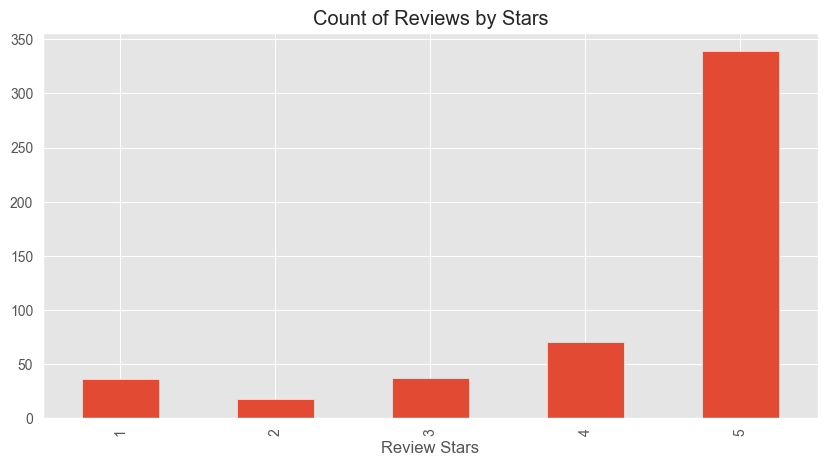

In [13]:
ax = (
    df["Score"]
    .value_counts()
    .sort_index()
    .plot(kind="bar", title="Count of Reviews by Stars", figsize=(10, 5))
)
ax.set_xlabel("Review Stars")
plt.show()

In [14]:
text = df["Text"][1]

In [15]:
sia.polarity_scores(
    "I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most."
)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [16]:
df.head()

Id   ProductId          UserId                      ProfileName   
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian  \
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time   
0                     1                       1      5  1303862400  \
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [17]:
df["Score"].sort_values(ascending=False)

0      5
301    5
315    5
314    5
313    5
      ..
267    1
99     1
216    1
335    1
361    1
Name: Score, Length: 500, dtype: int64

In [18]:
tokens = nltk.word_tokenize(text)

In [19]:
tokens

['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'Not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '``',
 'Jumbo',
 "''",
 '.']

In [20]:
tokens[:10]

['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts']

In [21]:
tagged = nltk.pos_tag(tokens)

In [22]:
tagged

[('Product', 'NNP'),
 ('arrived', 'VBD'),
 ('labeled', 'VBN'),
 ('as', 'IN'),
 ('Jumbo', 'NNP'),
 ('Salted', 'NNP'),
 ('Peanuts', 'NNP'),
 ('...', ':'),
 ('the', 'DT'),
 ('peanuts', 'NNS'),
 ('were', 'VBD'),
 ('actually', 'RB'),
 ('small', 'JJ'),
 ('sized', 'VBN'),
 ('unsalted', 'JJ'),
 ('.', '.'),
 ('Not', 'RB'),
 ('sure', 'JJ'),
 ('if', 'IN'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('error', 'NN'),
 ('or', 'CC'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('vendor', 'NN'),
 ('intended', 'VBN'),
 ('to', 'TO'),
 ('represent', 'VB'),
 ('the', 'DT'),
 ('product', 'NN'),
 ('as', 'IN'),
 ('``', '``'),
 ('Jumbo', 'NNP'),
 ("''", "''"),
 ('.', '.')]

In [23]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Product/NNP)
  arrived/VBD
  labeled/VBN
  as/IN
  (PERSON Jumbo/NNP Salted/NNP Peanuts/NNP)
  .../:
  the/DT
  peanuts/NNS
  were/VBD
  actually/RB
  small/JJ
  sized/VBN
  unsalted/JJ
  ./.
  Not/RB
  sure/JJ
  if/IN
  this/DT
  was/VBD
  an/DT
  error/NN
  or/CC
  if/IN
  the/DT
  vendor/NN
  intended/VBN
  to/TO
  represent/VB
  the/DT
  product/NN
  as/IN
  ``/``
  Jumbo/NNP
  ''/''
  ./.)


In [24]:
from tqdm.notebook import tqdm

In [25]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [26]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index": "Id"})
vaders = vaders.merge(df, how="left")

In [27]:
vaders.head()

Id    neg    neu    pos  compound   ProductId          UserId   
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW  \
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator   
0                       delmartian                     1  \
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary   
0                       1      5  1303862400  Good Quality Dog Food  \
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

In [28]:
vaders

Id    neg    neu    pos  compound   ProductId          UserId   
0      1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW  \
1      2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2      3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3      4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4      5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   
..   ...    ...    ...    ...       ...         ...             ...   
495  496  0.000  0.554  0.446    0.9725  B000G6RYNE   APGAA43E3WPN7   
496  497  0.059  0.799  0.142    0.7833  B000G6RYNE    ABR7HU5H1KNE   
497  498  0.025  0.762  0.212    0.9848  B000G6RYNE   AJQD2WWJYOYFQ   
498  499  0.041  0.904  0.055    0.1280  B000G6RYNE  A16YH487W9ZYO0   
499  500  0.000  0.678  0.322    0.9811  B000G6RYNE   A83YQC1XOU4CS   

                         ProfileName  HelpfulnessNumerator   
0                         delmartian                     1  \
1                             dll pa                     0   
2    Natalia Corres "Natalia Corres"                     1   
3                               Karl                     3   
4      Michael D. Bigham "M. Wassir"                     0   
..                               ...                   ...   
495                           Darren                     0   
496                            Keith                     0   
497                          bubbles                     0   
498                 Bruce G. Lindsay                     0   
499                         J. Baker                     0   

     HelpfulnessDenominator  Score        Time   
0                         1      5  1303862400  \
1                         0      1  1346976000   
2                         1      4  1219017600   
3                         3      2  1307923200   
4                         0      5  1350777600   
..                      ...    ...         ...   
495                       0      5  1201392000   
496                       0      5  1196726400   
497                       0      4  1186617600   
498                       0      4  1184198400   
499                       0      5  1183420800   

                             Summary   
0              Good Quality Dog Food  \
1                  Not as Advertised   
2              "Delight" says it all   
3                     Cough Medicine   
4                        Great taffy   
..                               ...   
495                    amazing chips   
496                   Best Chip Ever   
497  Tangy, spicy, and sweet- oh my!   
498        An indulgence with a bite   
499                The best I've had   

                                                  Text  
0    I have bought several of the Vitality canned d...  
1    Product arrived labeled as Jumbo Salted Peanut...  
2    This is a confection that has been around a fe...  
3    If you are looking for the secret ingredient i...  
4    Great taffy at a great price.  There was a wid...  
..                                                 ...  
495  i rarely eat chips but i saw these and tried t...  
496  This is easily the best potato chip that I hav...  
497  Kettle Chips Spicy Thai potato chips have the ...  
498  Okay, I should not eat potato chips, nor shoul...  
499  I don't write very many reviews but I have to ...  

[500 rows x 14 columns]

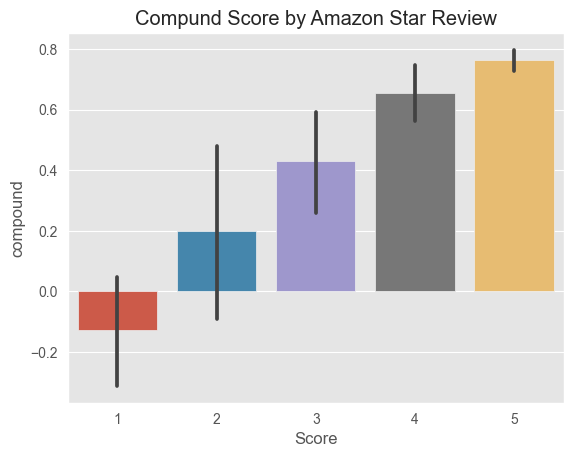

In [29]:
ax = sns.barplot(data=vaders, x="Score", y="compound")
ax.set_title("Compund Score by Amazon Star Review")
plt.show()

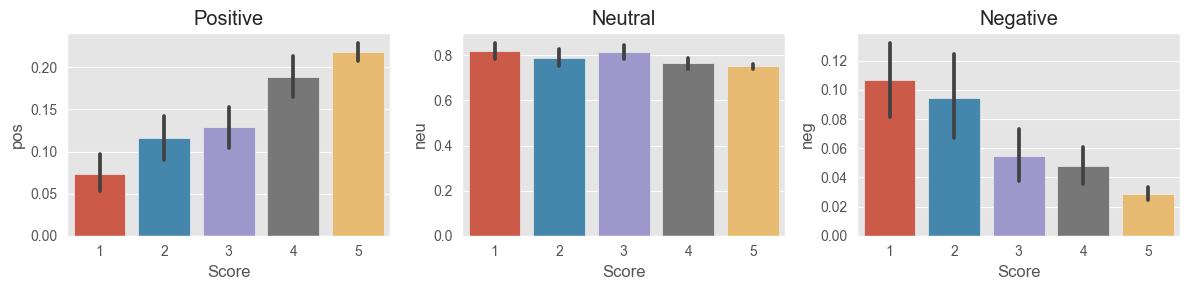

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [33]:
print(text)

I don't write very many reviews but I have to say that Kettle Brand chips are the best I have ever tasted.  Every flavor is dynamite.  If you are feeling iffy about honey dijon, I would recommend cheddar beer, absolutely amazing.  And they're healthy!  (besides a lil fat)  I have eaten a lot of chips in my day and Kettle takes the cake.  Enjoy, and don't eat them too fast.


In [34]:
encoded_text = tokenizer(text, return_tensors="pt")
output = model(**encoded_text)


def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg": scores[0],
        "roberta_neu": scores[1],
        "roberta_pos": scores[2],
    }
    return scores_dict

In [35]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row["Text"]
        myid = row["Id"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [37]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={"index": "Id"})
results_df = results_df.merge(df, how="left")

In [49]:
results_df.to_csv("Output.csv")

In [ ]:
sns.pairplot(
    data=results_df,
    vars=[
        "vader_neg",
        "vader_neu",
        "vader_pos",
        "roberta_neg",
        "roberta_neu",
        "roberta_pos",
    ],
    hue="Score",
    palette="tab10",
)
plt.show()

In [55]:
plt.show()

In [51]:
reviews = results_df.to_csv("/Users/deven/Reviews.csv")

In [41]:
results_df.query("Score == 1").sort_values("roberta_pos", ascending=False)[
    "Text"
].values[2]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [42]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [43]:
sent_pipeline("I love sentiment analysis!")

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [44]:
sent_pipeline("I am aroused")

[{'label': 'POSITIVE', 'score': 0.9974574446678162}]

In [45]:
sent_pipeline("boo hoo")

[{'label': 'NEGATIVE', 'score': 0.9349933862686157}]

In [54]:
?reviews

In [56]:
output = pd.read_csv("Output.csv")

In [57]:
output.head()

Unnamed: 0  Id  vader_neg  vader_neu  vader_pos  vader_compound   
0           0   1      0.000      0.695      0.305          0.9441  \
1           1   2      0.138      0.862      0.000         -0.5664   
2           2   3      0.091      0.754      0.155          0.8265   
3           3   4      0.000      1.000      0.000          0.0000   
4           4   5      0.000      0.552      0.448          0.9468   

   roberta_neg  roberta_neu  roberta_pos   ProductId          UserId   
0     0.009624     0.049980     0.940396  B001E4KFG0  A3SGXH7AUHU8GW  \
1     0.508986     0.452414     0.038600  B00813GRG4  A1D87F6ZCVE5NK   
2     0.003229     0.098067     0.898704  B000LQOCH0   ABXLMWJIXXAIN   
3     0.002295     0.090219     0.907486  B000UA0QIQ  A395BORC6FGVXV   
4     0.001635     0.010302     0.988063  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator   
0                       delmartian                     1  \
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary   
0                       1      5  1303862400  Good Quality Dog Food  \
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

In [59]:
output.sort_values(key="Scores", ascending=False)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [61]:
# Run for Roberta Model
encoded_text = tokenizer(text, return_tensors="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    "roberta_neg": scores[0],
    "roberta_neu": scores[1],
    "roberta_pos": scores[2],
}
print(scores_dict)

{'roberta_neg': 0.0024397606, 'roberta_neu': 0.011327226, 'roberta_pos': 0.986233}


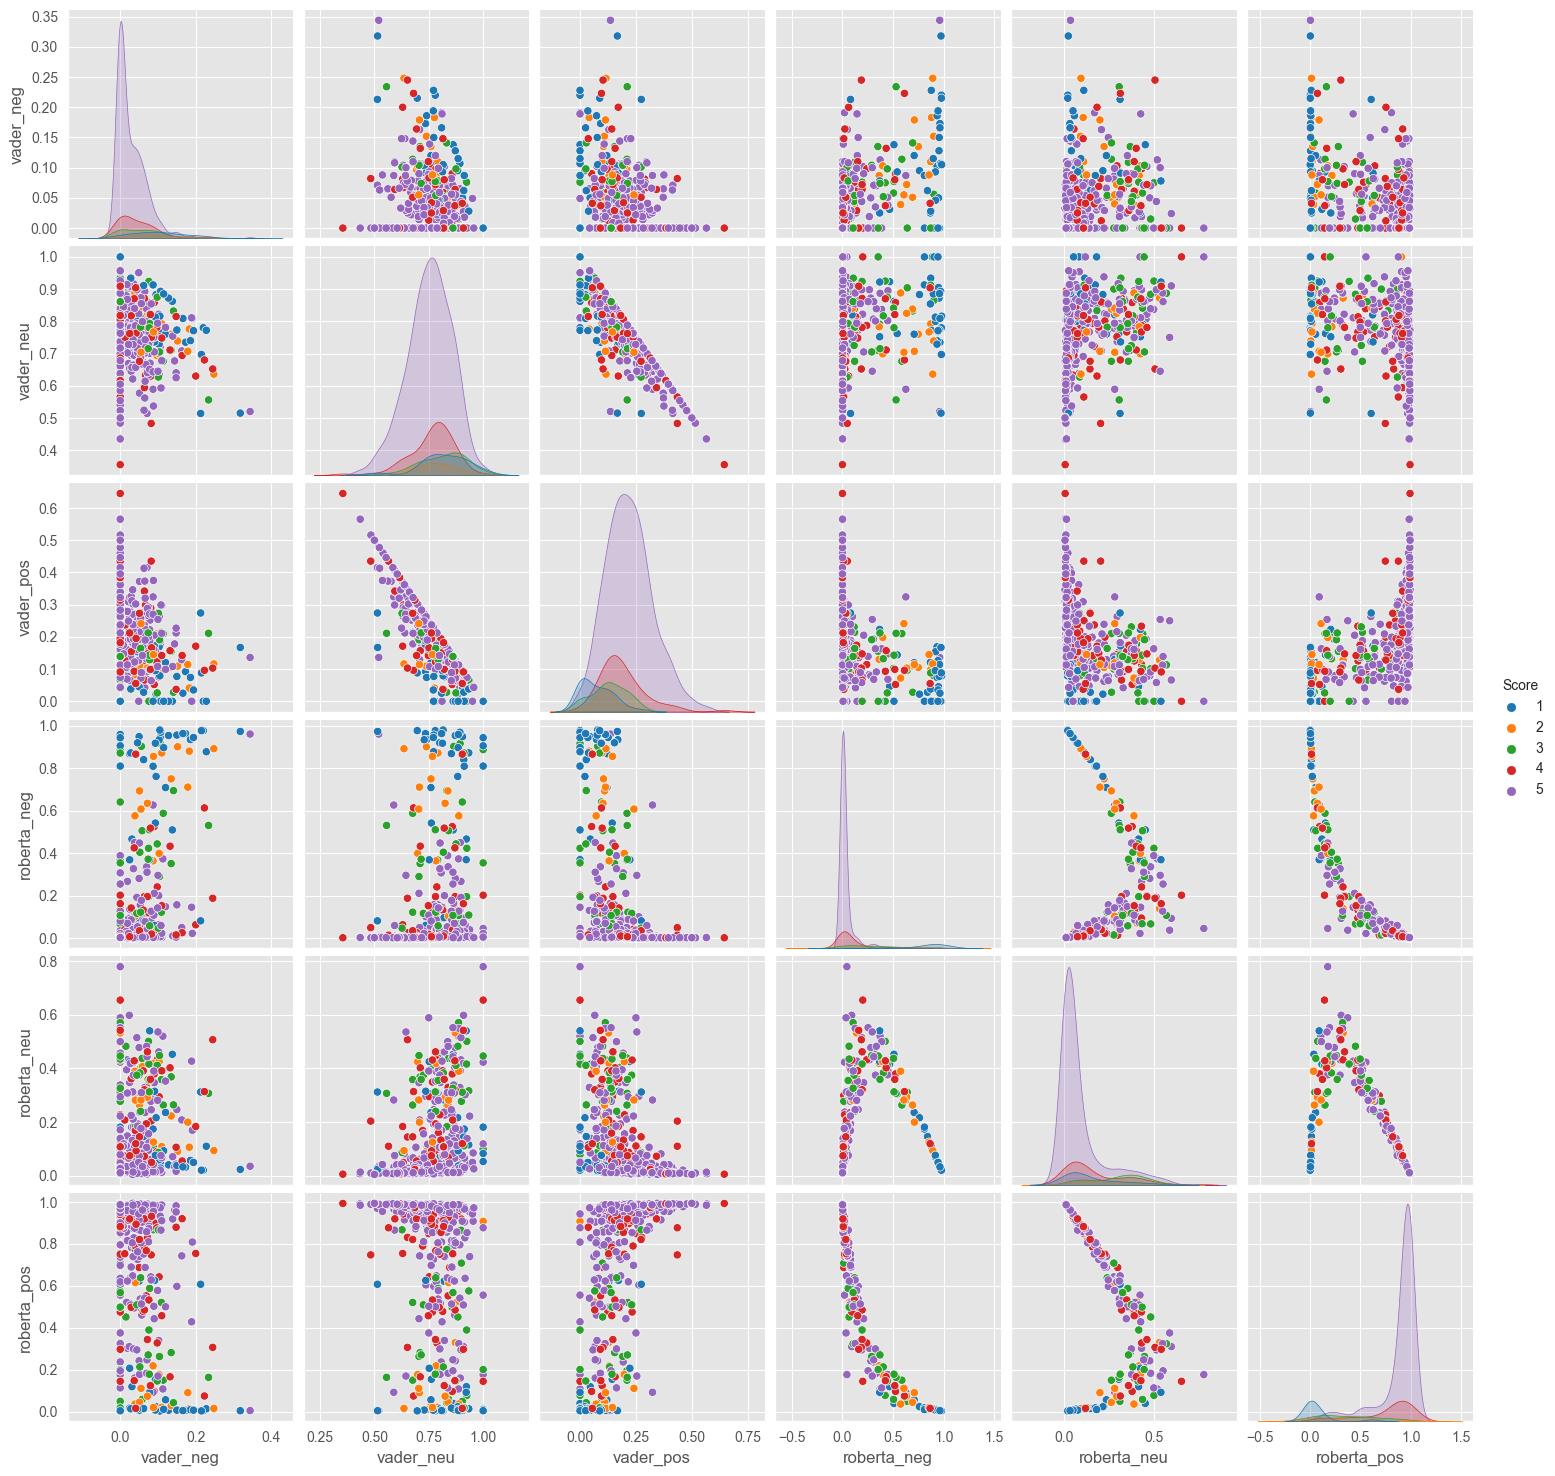

In [65]:
sns.pairplot(
    data=results_df,
    vars=[
        "vader_neg",
        "vader_neu",
        "vader_pos",
        "roberta_neg",
        "roberta_neu",
        "roberta_pos",
    ],
    hue="Score",
    palette="tab10",
)
plt.show()